## Compensated Poisson Process

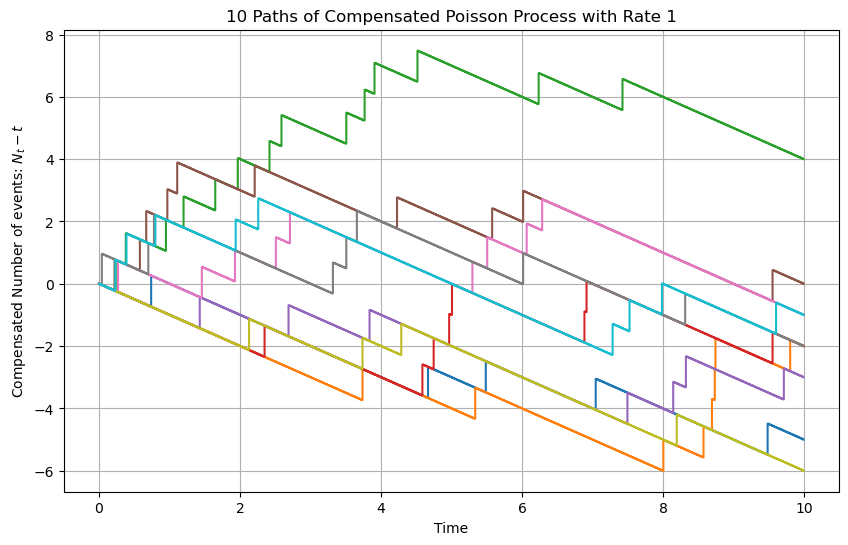

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
rate = 1  # Rate parameter of the Poisson process 𝜆
T = 10  # Length of the time interval, here [0, 10]
dt = 0.01  # Time step
num_paths = 10  # Number of paths to generate

# Initialize a list to store paths
paths = []

# Generate 10 paths of the compensated Poisson process
for _ in range(num_paths):
    path = [0]  # Initialize path with time 0 and event count 0
    t = 0  # Initialize time
    while t < T:  # Loop to generate events within the time interval [0, T]
        increment = np.random.poisson(rate * dt)  # Generate an increment based on given time step and rate parameter
        t += dt  # Update time
        path.append(path[-1] + increment - rate * dt)  # Append event count to the path with time compensation
    paths.append(path[:-1])  # Append the generated path to the list, excluding the T end point

# Generate time axis
time_axis = np.linspace(0, T - dt, len(paths[0]))

# Plot the paths of the compensated Poisson process
plt.figure(figsize=(10, 6))  # Create a plot window
for path in paths:  # Loop through each path
    plt.step(time_axis, path, where='post')  # Plot a step plot, ensuring it starts from the left side of each time point and exclude the T end point
plt.xlabel('Time')  # Set x-axis label
plt.ylabel('Compensated Number of events: $N_t - t$')  # Set y-axis label
plt.title('10 Paths of Compensated Poisson Process with Rate 1')  # Set plot title
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot


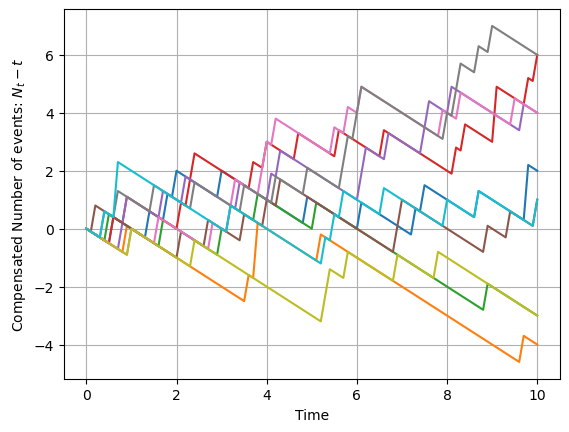

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def comp_poisson(interval, step):
  n = int(interval / step)
  N = [0]
  P = [0]
  for i in range(n):
    t = (i+1) * step
    N.append(np.random.poisson(1 * step) + N[-1])
    P.append(N[-1] - t)
  return P
     
P = []
for i in range(10):
  P.append(comp_poisson(10, 0.1))
     
x = np.linspace(0.0, 10.0, 101)
for i in range(10):
  plt.plot(x, P[i])
plt.xlabel('Time') 
plt.ylabel('Compensated Number of events: $N_t - t$')  
plt.grid(True)

## Brownian Motion

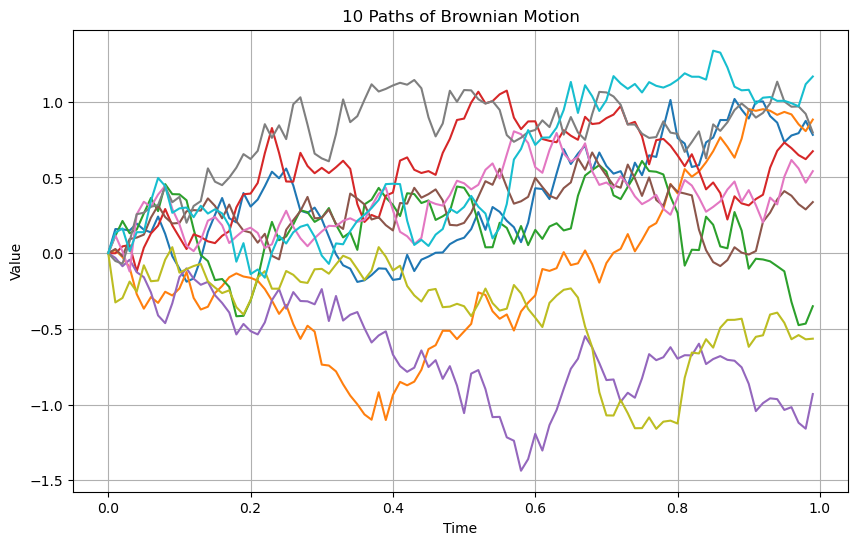

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 1  # Length of the time interval, here [0, 10]
dt = 0.01  # Time step
num_paths = 10  # Number of paths to generate

# Initialize a list to store paths
paths = []

# Generate 10 paths of Brownian motion
for _ in range(num_paths):
    path = [0]  # Initialize path with time 0 and value 0
    t = 0  # Initialize time
    while t < T:  # Loop to generate values within the time interval [0, T]
        increment = np.random.normal(0, np.sqrt(dt))  # Generate a normal increment based on given time step
        t += dt  # Update time
        path.append(path[-1] + increment)  # Append value to the path
    paths.append(path[:-1])  # Append the generated path to the list, excluding the T end point
# Generate time axis
time_axis = np.linspace(0, T - dt, len(paths[0]))

# Plot the paths of Brownian motion
plt.figure(figsize=(10, 6))  # Create a plot window
for path in paths:  # Loop through each path
    plt.plot(time_axis, path)  # Plot the path
plt.xlabel('Time')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('10 Paths of Brownian Motion')  # Set plot title
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot


## The square of Brownian motion, compensated

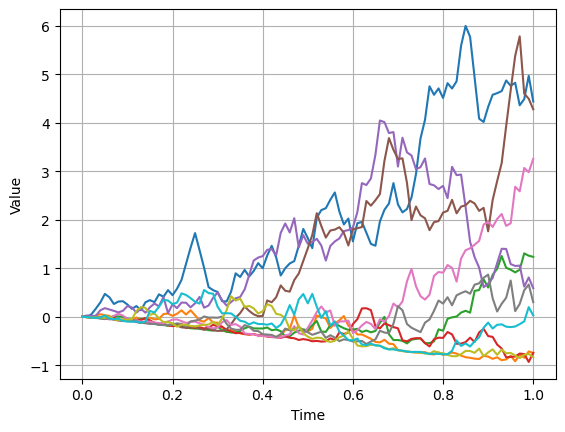

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def b_sqr_compensated(interval, step):
  n = int(interval / step)
  B = [0]
  P = [0]
  for i in range(n):
    t = (i+1) * step
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
    P.append(B[-1]**2 - t)
  return P

P = []
for i in range(10):
  P.append(b_sqr_compensated(1, 0.01))

x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  plt.plot(x, P[i])
plt.xlabel('Time')  
plt.ylabel('Value')  
plt.grid(True) 

## Geometric Brownian motion

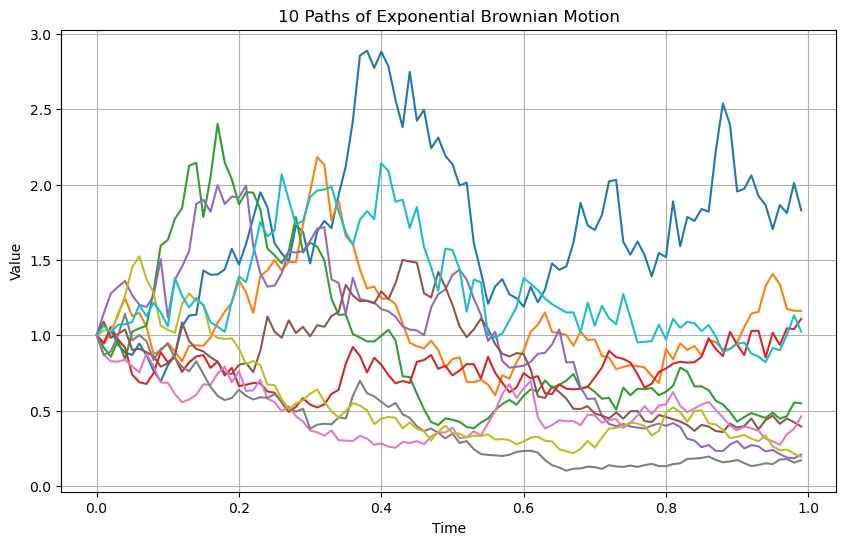

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 1  # Length of the time interval, here [0, 1]
dt = 0.01  # Time step
num_paths = 10  # Number of paths to generate

# Initialize a list to store paths
paths = []

# Generate 10 paths of Brownian motion
for _ in range(num_paths):
    path = [0]  # Initialize path with time 0 and value 0
    t = 0  # Initialize time
    while t < T:  # Loop to generate values within the time interval [0, T]
        increment = np.random.normal(0, np.sqrt(dt))  # Generate a normal increment based on given time step
        t += dt  # Update time
        path.append(path[-1] + increment)  # Append value to the path
    paths.append(path[:-1])  # Append the generated path to the list, excluding the T end point

# Convert paths to exponential process S_t = exp(B_t - t/2)
exp_paths = []
for path in paths:
    exp_path = np.exp(np.array(path) - np.linspace(0, T, len(path))/2)
    exp_paths.append(exp_path)

# Generate time axis
time_axis = np.linspace(0, T - dt, len(exp_paths[0]))

# Plot the paths of exponential Brownian motion
plt.figure(figsize=(10, 6))  # Create a plot window
for exp_path in exp_paths:  # Loop through each path
    plt.plot(time_axis, exp_path)  # Plot the path
plt.xlabel('Time')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('10 Paths of Exponential Brownian Motion')  # Set plot title
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot


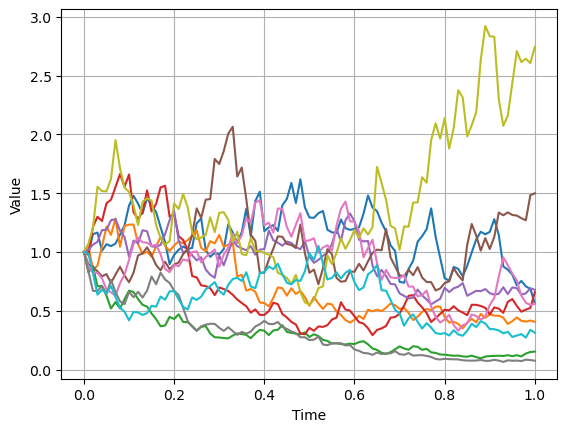

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def geo_brownian(interval, step):
  n = int(interval / step)
  B = [0]
  P = [1]
  for i in range(n):
    t = (i+1) * step
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
    P.append(np.exp(B[-1] - t/2))
  return P
     
P = []
for i in range(10):
  P.append(geo_brownian(1, 0.01))
     
x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  plt.plot(x, P[i])
plt.xlabel('Time')  
plt.ylabel('Value') 
plt.grid(True) 